<a href="https://colab.research.google.com/github/VivekMuraleedharanGit/fastai_learning/blob/main/Multilabel_classification_using_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade

In [4]:
from fastai.vision.all import *
from fastai.data.all import *


For the multilabel problem we will use the pascal dataset contains different classes

In [7]:
url ='https://s3.amazonaws.com/fast-ai-imagelocal/pascal_2012.tgz'
source = untar_data(url)

In [11]:
df = pd.read_csv(source/"train.csv")
df.head()

,fname,labels,is_valid
0,2008_000002.jpg,tvmonitor,True
1,2008_000003.jpg,train person,True
2,2008_000007.jpg,boat,True
3,2008_000008.jpg,horse person,False
4,2008_000009.jpg,cow,True


So it looks like we have one column with filenames, one column with the labels (separated by space) and one column that tells us if the filename should go in the validation set or not.

In [44]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader(0, pref=source/"train"),
                   get_y=ColReader(1, label_delim=' '),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

In [45]:
dls= pascal.dataloaders(df)

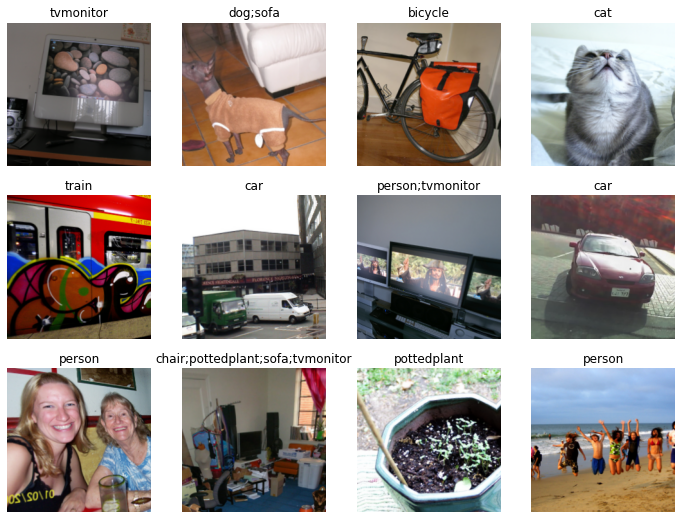

In [46]:
dls.show_batch(max_n=12)

The only difference is in the metric we pass: error_rate will not work for a multi-label problem, but we can use accuracy_thresh.

In [19]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(valley=tensor(0.0021))

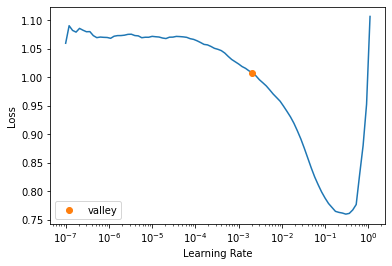

In [20]:
learn.lr_find()

In [22]:
learn.fine_tune(3,2.1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.266329,0.099107,0.966229,01:36


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.151341,0.308073,0.940744,01:50
1,0.147255,0.119754,0.958458,01:50
2,0.110184,0.095924,0.966409,01:49


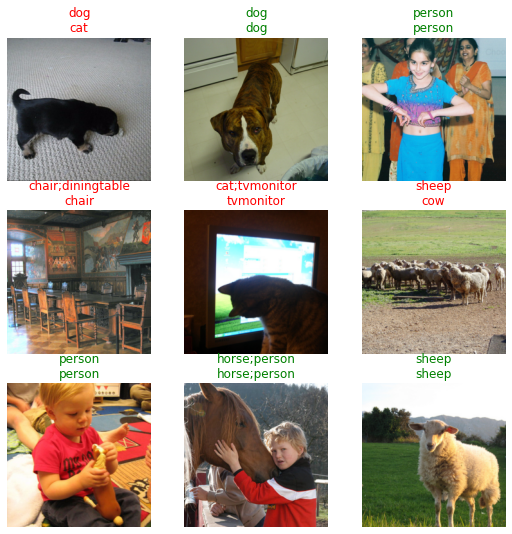

In [23]:
learn.show_results()

In [26]:
learn.predict('/content/sample_data/OIP.jpg')

((#1) ['cow'],
 tensor([False, False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False, False]),
 tensor([8.1262e-05, 1.2194e-05, 1.0937e-03, 3.7238e-05, 1.2453e-04, 3.5898e-05,
         2.1926e-03, 1.9036e-04, 1.0707e-04, 7.5751e-01, 3.9799e-06, 3.4297e-03,
         5.0233e-02, 1.0834e-05, 1.6447e-02, 7.8504e-06, 1.3631e-01, 4.0154e-05,
         1.8969e-05, 6.9312e-06]))

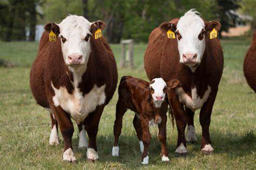

In [31]:
Image.open('/content/sample_data/OIP.jpg').to_thumb(256)

In [33]:
learn.predict("/content/sample_data/person cand car.jpg")

((#2) ['car','person'],
 tensor([False, False, False, False, False, False,  True, False, False, False,
         False, False, False, False,  True, False, False, False, False, False]),
 tensor([2.1911e-04, 2.2508e-01, 4.0296e-04, 2.8132e-03, 1.1117e-02, 2.8855e-01,
         9.5438e-01, 1.0628e-03, 1.3142e-02, 1.5339e-04, 3.0015e-03, 9.2733e-03,
         2.7599e-03, 1.4697e-02, 9.7148e-01, 8.0112e-02, 2.0181e-03, 1.2286e-03,
         9.1634e-04, 3.4842e-04]))

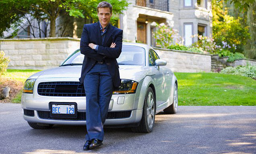

In [43]:
Image.open('/content/sample_data/person cand car.jpg').to_thumb(256)

In [34]:
learn.export()

In [39]:
learn.predict('/content/sample_data/dog and cat.jpg')

((#2) ['cat','dog'],
 tensor([False, False, False, False, False, False, False,  True, False, False,
         False,  True, False, False, False, False, False, False, False, False]),
 tensor([6.4929e-06, 1.4773e-06, 4.3140e-04, 1.5584e-04, 6.5827e-04, 1.6723e-05,
         2.5681e-04, 5.8812e-01, 2.6801e-02, 1.4413e-04, 2.9477e-04, 8.3494e-01,
         5.5218e-04, 3.7845e-05, 1.9413e-03, 8.0065e-03, 7.6324e-04, 7.9742e-03,
         3.2928e-06, 1.7607e-04]))

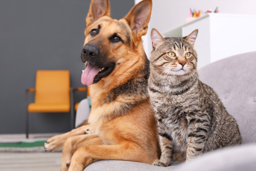

In [41]:
Image.open('/content/sample_data/dog and cat.jpg').to_thumb(256)

In [48]:
model= load_learner('/content/export.pkl')

In [49]:
model.predict('/content/sample_data/dog and cat.jpg')

((#2) ['cat','dog'],
 tensor([False, False, False, False, False, False, False,  True, False, False,
         False,  True, False, False, False, False, False, False, False, False]),
 tensor([6.4929e-06, 1.4773e-06, 4.3140e-04, 1.5584e-04, 6.5827e-04, 1.6723e-05,
         2.5681e-04, 5.8812e-01, 2.6801e-02, 1.4413e-04, 2.9477e-04, 8.3494e-01,
         5.5218e-04, 3.7845e-05, 1.9413e-03, 8.0065e-03, 7.6324e-04, 7.9742e-03,
         3.2928e-06, 1.7606e-04]))